# Analyzing the Image and Network Layers

## Stepping through the layers of a CNN to see what is happening to the images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [319]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

### Load in Image and view it

In [177]:
img = cv2.imread('C:\\Users\\jltsa\\Desktop\\Project_2\\images\\poison_oak\\50_poisonoak.jpg')

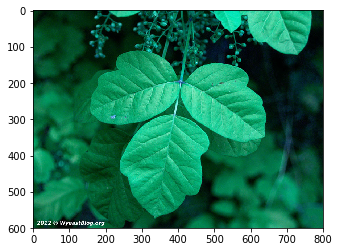

In [178]:
plt.imshow(img)
plt.show()

In [128]:
img.shape

(600, 800, 3)

### Reference to AlexNet architecture so you can see the layers

In [111]:
class AlexNet:
    #optimizer to use should be 'sgd'
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        #input shape is 227x227x3
        inputShape = (height, width, depth)
        model.add(Conv2D(filters=96, kernel_size=11, strides=4,
                         input_shape=inputShape, activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        model.add(Conv2D(filters=256, kernel_size=5, strides=1,
                         padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        model.add(Conv2D(filters=384, kernel_size=3, strides=1,
                         padding='same', activation='relu'))
        model.add(Conv2D(filters=256, kernel_size=3, strides=1,
                         padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(classes, activation='softmax'))
        
        return model

## Convolutional Layer

In [121]:
#1 convolutional layer with 3 filters, with a 3x3 kernel
model = Sequential()
model.add(Conv2D(3,3,3,input_shape=img.shape))

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(600, 800,...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
#Keras expects teh images in batches, so we add another dimension for it
add_batch_img = np.expand_dims(img, axis=0)

In [114]:
add_batch_img.shape

(1, 600, 800, 3)

In [115]:
conv_img = model.predict(add_batch_img)

In [171]:
#plotting the image
def visualize(image):
    #get rid of added dimension
    img = np.squeeze(image, axis=0)
    print(image.shape)
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 598, 798, 3)


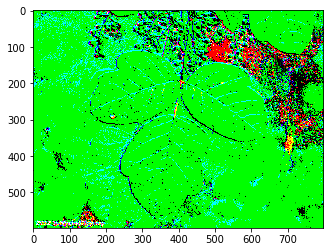

In [117]:
#the kernels are randomly intialized at the time the Conv2D layer is added
visualize(conv_img)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(600, 800,...)`
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 598, 798, 3)


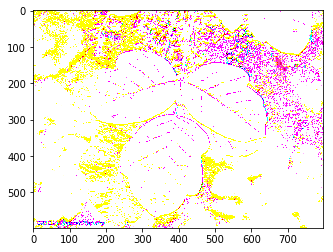

In [126]:
#Run this cell multiple times to see how to output changes as the kernel initialization change
#You will see how different features are noticed
model2 = Sequential()
model2.add(Conv2D(3,3,3,input_shape=img.shape))
img2 = cv2.imread('C:\\Users\\jltsa\\Desktop\\Project_2\\images\\poison_oak\\50_poisonoak.jpg',cv2.IMREAD_COLOR)
add_batch_img2 = np.expand_dims(img2, axis=0)
conv_img2 = model2.predict(add_batch_img2)
visualize(conv_img2)

### Pulling out kernels

In [160]:
#Convolutional layer of the first model
conv_layer = model.layers[0]
weights = conv_layer.get_weights()
len(weights)

2

In [156]:
kernels1 = weights[0]
#(length, width, channels, number of kernels)
kernels1.shape

(3, 3, 3, 3)

In [154]:
#pull out first kernel of the 1st channel
kernel1_1 = kernels1[:,:,0,0]
kernel1_1.shape

(3, 3)

In [157]:
#first kernel of the 2nd channel
kernel1_2 = kernels1[:,:,1,0]
#first kernel of the 3nd channel
kernel1_3 = kernels1[:,:,2,0]

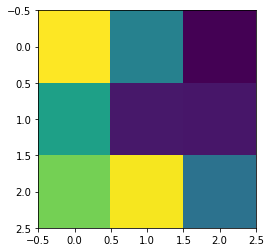

In [155]:
#first kernel of the 1st channel
plt.imshow(kernel1_1)

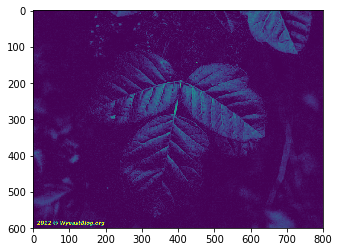

In [166]:
#First channel of the image
plt.imshow(img[:,:,0])

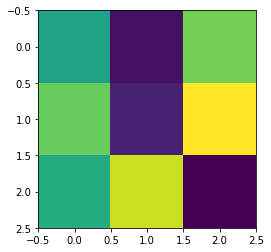

In [158]:
#first kernel of the 2nd channel
plt.imshow(kernel1_2)

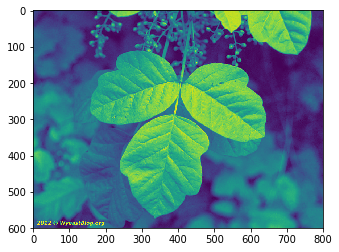

In [167]:
#2nd channel of the image
plt.imshow(img[:,:,1])

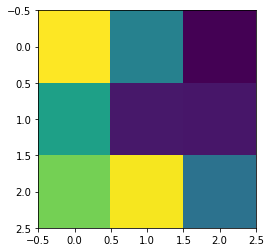

In [169]:
#first kernel of the 3rd channel
plt.imshow(kernel1_3)

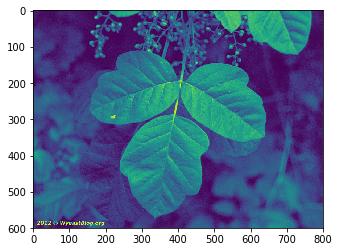

In [168]:
#3rdchannel of the image
plt.imshow(img[:,:,2])

The images above are just the 3 separate channels of teh image split apart, and the kernels which would convolve over those splits.  These are not filtered through the kernels as are the images run throught the convolutional layer.

### Visualize the channel filters

In [323]:
#Squash the image down to see the color channels better
def visualize_pretty(model, img):
    add_batch_img = np.expand_dims(img, axis=0)
    conv_img = model.predict(add_batch_img)
    #get rid of added dimension
    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    conv_img = conv_img.reshape(conv_img.shape[:2])
    print(conv_img.shape)
    plt.imshow(conv_img)

(598, 798, 1)
(598, 798)


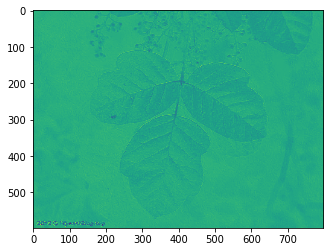

In [329]:
#Intitalize with a single 3x3 kernel, run this cell multiple times to see what the filter is seeing
model3 = Sequential()
model3.add(Conv2D(1,(3,3),input_shape=img.shape))
visualize_pretty(model3, img)

In [235]:
conv_layer2 = model3.layers[0]
weights2 = conv_layer2.get_weights()
kernels2 = weights2[0]
print(kernels2.shape)
kernel2_1 = kernels2[:,:,0,0]
kernel2_2 = kernels2[:,:,1,0]
kernel2_3 = kernels2[:,:,2,0]

(3, 3, 3, 1)


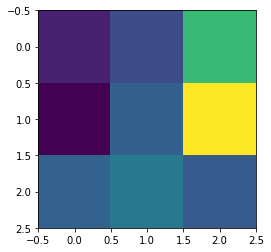

In [236]:
plt.imshow(kernel2_1)

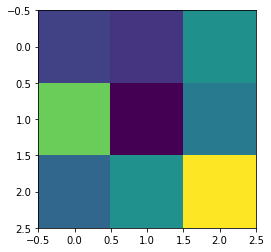

In [237]:
plt.imshow(kernel2_2)

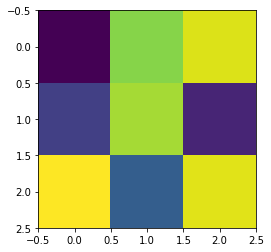

In [238]:
plt.imshow(kernel2_3)

## Adding an Activation Layer

(598, 798, 1)
(598, 798)


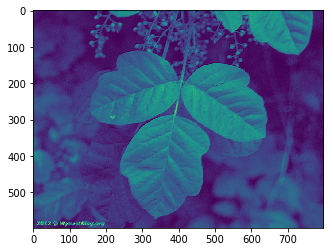

In [333]:
model4 = Sequential()
model4.add(Conv2D(1,(3,3),input_shape=img.shape))
model4.add(Activation('relu'))
visualize_pretty(model4, img)

## Adding Pooling Layer

(119, 159, 1)
(119, 159)


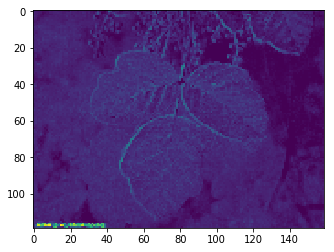

In [346]:
model4 = Sequential()
model4.add(Conv2D(1,(3,3),input_shape=img.shape))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(5,5)))
visualize_pretty(model4, img)

### Running the Image through all the convolutional layers (1 kernel), Max Pooling Layers, and Activation Layers of AlexNet

(17, 23, 1)
(17, 23)


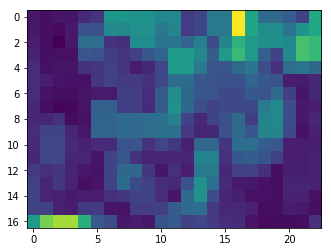

In [357]:
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=11, strides=4,
                         input_shape=img.shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=1, kernel_size=5, strides=1,
                         padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=1, kernel_size=3, strides=1,
                         padding='same', activation='relu'))
model.add(Conv2D(filters=1, kernel_size=3, strides=1,
                         padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
visualize_pretty(model, img)